In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
sdir = r'D:\ADSA\KULIAH\SEMESTER 4\KECERDASAN BUATAN\Project UAS\dataset\Kecerdasan Buatan Klasifikasi Hewan Bagi Anak'

filepaths = []
labels = []
classlist = os.listdir(sdir)
for klass in classlist:
    classpath = os.path.join(sdir, klass)
    if os.path.isdir(classpath):
        flist = os.listdir(classpath)
        for f in flist:
            fpath = os.path.join(classpath, f)
            filepaths.append(fpath)
            labels.append(klass)

Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis=1)
print(df.head())
print(df['labels'].value_counts())


                                           filepaths  labels
0  D:\ADSA\KULIAH\SEMESTER 4\KECERDASAN BUATAN\Pr...  Anjing
1  D:\ADSA\KULIAH\SEMESTER 4\KECERDASAN BUATAN\Pr...  Anjing
2  D:\ADSA\KULIAH\SEMESTER 4\KECERDASAN BUATAN\Pr...  Anjing
3  D:\ADSA\KULIAH\SEMESTER 4\KECERDASAN BUATAN\Pr...  Anjing
4  D:\ADSA\KULIAH\SEMESTER 4\KECERDASAN BUATAN\Pr...  Anjing
labels
Anjing          80
Ayam            80
Bebek           80
Hiu             80
Kucing          80
Kuda Laut       80
Macan           80
Paus            80
Ikan            74
Bintang Laut    73
Name: count, dtype: int64


In [4]:
train_split = .7
test_split = .2
dummy_split = test_split / (1 - train_split)
train_df, dummy_df = train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
test_df, valid_df = train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)
print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))


train_df length:  550   test_df length:  158   valid_df length:  79


In [5]:
height=224
width=224
channels=3
batch_size=64

img_shape=(height, width, channels)
img_size=(height, width)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)

gen=ImageDataGenerator(
    rescale=1./255,
    )
train_gen=gen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)

validgen=ImageDataGenerator(rescale=1./255)
valid_gen=validgen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)

testgen=ImageDataGenerator(rescale=1./255)
test_gen=testgen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)

classes=list(train_gen.class_indices.keys())
print (classes)
class_count=len(classes)


test batch size:  79   test steps:  2
Found 550 validated image filenames belonging to 10 classes.
Found 79 validated image filenames belonging to 10 classes.
Found 158 validated image filenames belonging to 10 classes.
['Anjing', 'Ayam', 'Bebek', 'Bintang Laut', 'Hiu', 'Ikan', 'Kucing', 'Kuda Laut', 'Macan', 'Paus']


In [6]:
height = 224
width = 224
channels = 3
batch_size = 64

img_shape = (height, width, channels)
img_size = (height, width)
length = len(test_df)
test_batch_size = sorted([int(length / n) for n in range(1, length + 1) if length % n == 0 and length / n <= 80], reverse=True)[0]
test_steps = int(length / test_batch_size)
print('test batch size: ', test_batch_size, '  test steps: ', test_steps)


test batch size:  79   test steps:  2


In [7]:
gen = ImageDataGenerator(rescale=1. / 255)
train_gen = gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)

validgen = ImageDataGenerator(rescale=1. / 255)
valid_gen = validgen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)

testgen = ImageDataGenerator(rescale=1. / 255)
test_gen = testgen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)

classes = list(train_gen.class_indices.keys())
print(classes)
class_count = len(classes)


Found 550 validated image filenames belonging to 10 classes.
Found 79 validated image filenames belonging to 10 classes.
Found 158 validated image filenames belonging to 10 classes.
['Anjing', 'Ayam', 'Bebek', 'Bintang Laut', 'Hiu', 'Ikan', 'Kucing', 'Kuda Laut', 'Macan', 'Paus']


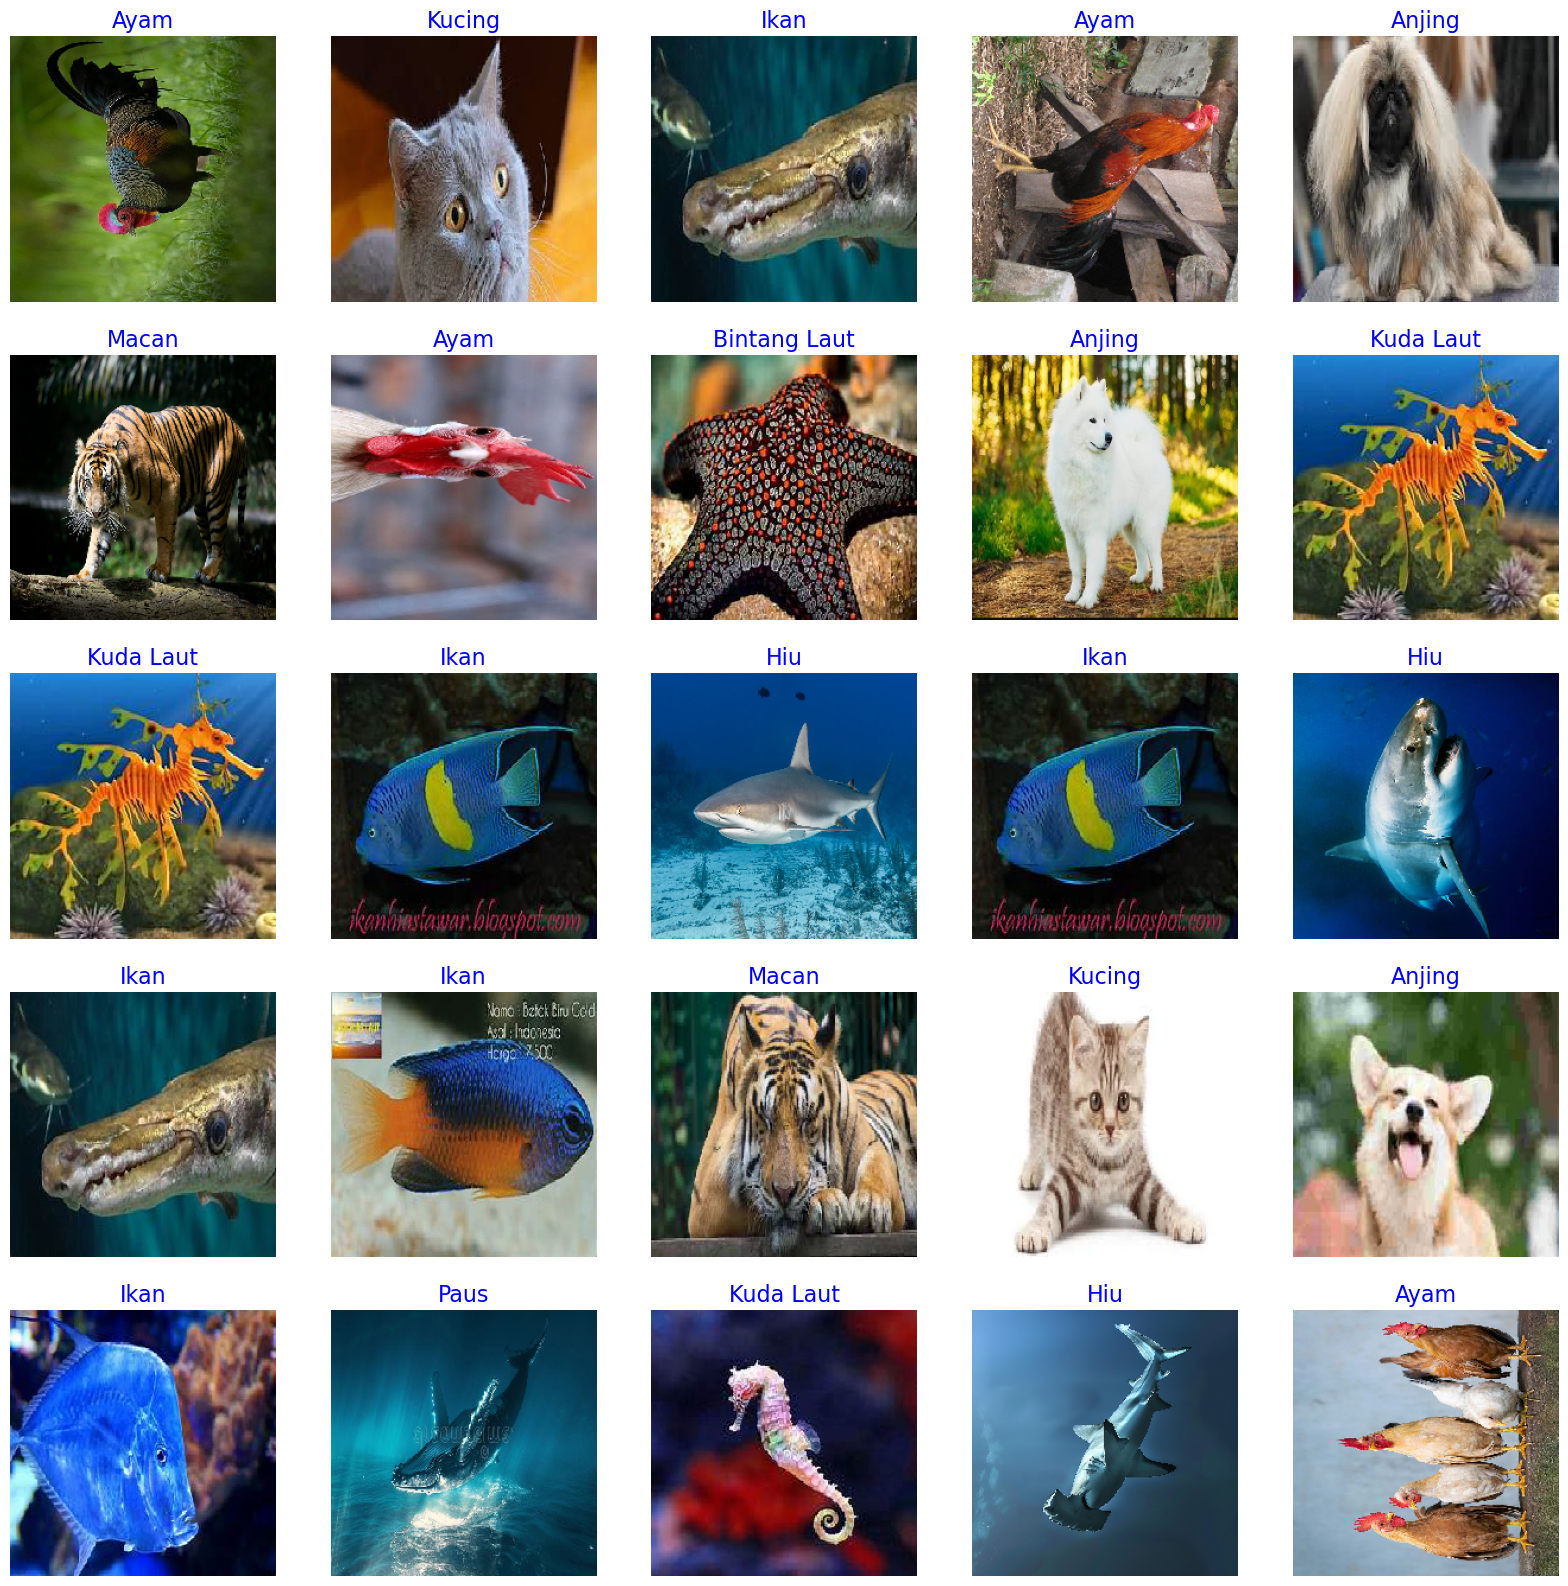

In [8]:
def show_image_samples(gen):
    test_dict = test_gen.class_indices
    classes = list(test_dict.keys())
    images, labels = next(gen)  # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length = len(labels)
    r = min(length, 25)  # show maximum of 25 images
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = images[i]
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

show_image_samples(train_gen)


In [12]:
base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_tensor=Input(shape=(224, 224, 3))) 
base_model.trainable = False

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1)(x)
x = Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1)(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Dropout(rate=0.5)(x)
x = Flatten()(x)
outputs = Dense(class_count, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 32)       │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,463,474 (81.88 MB)

 Trainable params: 601,994 (2.30 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [14]:
epochs =5

history=model.fit(x=train_gen, epochs=epochs, validation_data=valid_gen)

Epoch 1/5


c:\Users\agusa\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 355s 32s/step - accuracy: 0.2592 - loss: 2.1899 - val_accuracy: 0.7722 - val_loss: 1.0140
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 144s 12s/step - accuracy: 0.6440 - loss: 1.0155 - val_accuracy: 0.9114 - val_loss: 0.4259
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 124s 12s/step - accuracy: 0.8429 - loss: 0.5305 - val_accuracy: 0.8987 - val_loss: 0.2626
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 126s 12s/step - accuracy: 0.9164 - loss: 0.2653 - val_accuracy: 0.9114 - val_loss: 0.4723
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 124s 13s/step - accuracy: 0.9483 - loss: 0.1661 - val_accuracy: 0.9241 - val_loss: 0.2378


In [15]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

In [17]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()

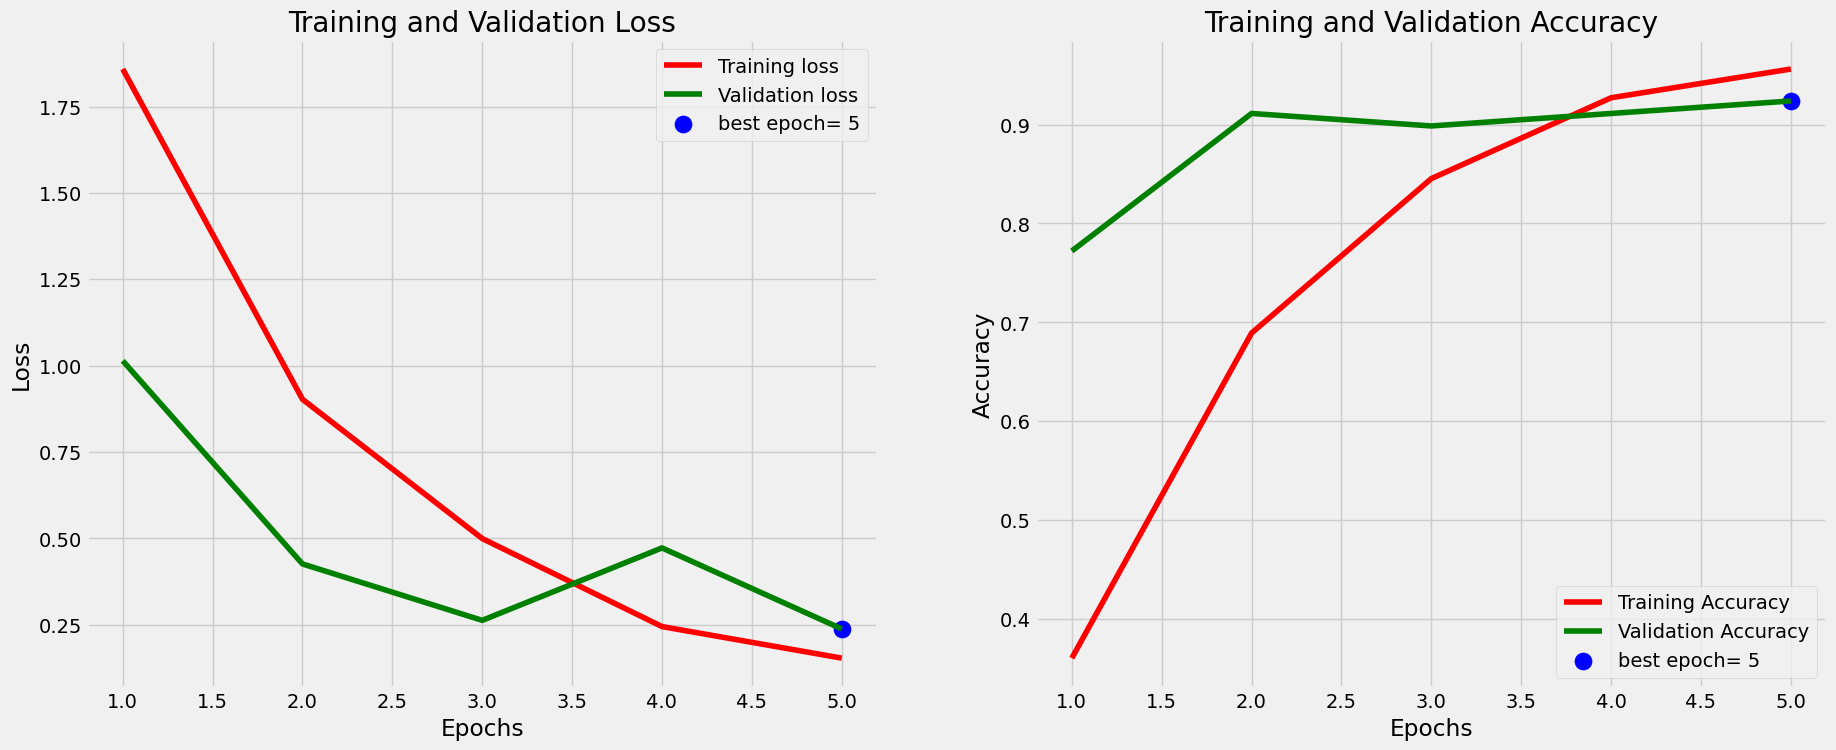

c:\Users\agusa\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 15s/step - accuracy: 0.9367 - loss: 0.2576
accuracy on the test set is 93.67 %



NameError: name 'model_name' is not defined

In [18]:
tr_plot(history,0)
save_dir=r'./ADSA\KULIAH\SEMESTER 4\KECERDASAN BUATAN\Klasfikasi hewan darat dan laut'
subject='Klasifikasi Hewan'
acc=model.evaluate( test_gen, batch_size=test_batch_size, verbose=1, steps=test_steps, return_dict=False)[1]*100
msg=f'accuracy on the test set is {acc:5.2f} %'
print_in_color(msg, (0,255,0),(55,65,80))
save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
model.save(save_loc)